Q4. Campaign Impact Analysis 

○ What are the key performance indicators (KPIs) for assessing the success of
marketing campaigns?
○ Objective: Develop a framework for measuring campaign success using data
such as engagement rate, conversion rate, and customer lifetime value (CLV).
○ Expected Outcome: Propose actionable insights on how to improve marketing
Strategies.


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np

In [93]:
#Importing Data
df_campaigns = pd.read_csv("../Data DSA3101/campaigns.csv")
df_engagement = pd.read_csv("../Data DSA3101/customer_engagement.csv")
df_churn_prob = pd.read_excel("../Data DSA3101/churn_probability.xlsx")
df_transactions = pd.read_csv("../Data DSA3101/transactions_summary.csv")

In [94]:
#Data merging
df = df_transactions.merge(df_engagement,on="customer_id",how="left")
df = df.merge(df_churn_prob,on="customer_id",how="left")
df = df.merge(df_campaigns[["campaign_id", "campaign_name"]], on="campaign_id", how="left")

#Making columns binary for easier analysis
binary_columns = ['sent','delivered','opened','clicked','conversion_status']
df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

#Changing engagement time to seconds
df["engagement_time"] = pd.to_timedelta(df['engagement_time']).dt.total_seconds()

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29540 entries, 0 to 29539
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      29540 non-null  int64  
 1   days_since_last_transaction      29540 non-null  int64  
 2   current_balance                  29540 non-null  float64
 3   peak_month                       29540 non-null  int64  
 4   peak_month_spending              29540 non-null  float64
 5   peak_month_frequency             29540 non-null  int64  
 6   total_transactions_3m            29540 non-null  int64  
 7   total_transactions_6m            29540 non-null  int64  
 8   total_transactions_12m           29540 non-null  int64  
 9   total_transaction_amount_3m      29540 non-null  float64
 10  total_transaction_amount_6m      29540 non-null  float64
 11  total_transaction_amount_12m     29540 non-null  float64
 12  average_transactio

C:\Users\emily\AppData\Local\Temp\ipykernel_26636\1791307695.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})


,customer_id,days_since_last_transaction,current_balance,peak_month,peak_month_spending,peak_month_frequency,total_transactions_3m,total_transactions_6m,total_transactions_12m,total_transaction_amount_3m,...,online_transaction_ratio_12m,engagement_id,campaign_id,sent,delivered,opened,clicked,engagement_time,conversion_status,churn_prob
count,29540.000000,29540.000000,29540.000000,29540.000000,29540.000000,29540.000000,29540.000000,29540.00000,29540.000000,29540.000000,...,29540.000000,28921.000000,28921.000000,28921.0,28921.000000,28921.000000,28921.000000,28921.000000,28921.000000,27821.000000
mean,5010.844821,23.494381,6793.870851,6.595701,16699.666485,43.233717,98.601286,197.26872,402.691638,18321.173662,...,0.643558,14461.000000,24.212994,1.0,0.905501,0.238858,0.078663,46763.231009,0.091802,0.047210
std,2887.939591,35.462239,4675.937998,3.585805,17534.768893,11.515244,33.939260,66.91782,100.900815,15154.282608,...,0.082904,8348.917904,14.180542,0.0,0.292526,0.426393,0.269216,10902.939568,0.288751,0.109965
min,1.000000,0.000000,-2776.332936,1.000000,-6275.590451,12.000000,0.000000,0.00000,104.000000,-7723.243517,...,0.298947,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,4137.000000,0.000000,0.001701
25%,2512.000000,4.000000,3625.809532,3.000000,5997.673471,37.000000,80.000000,162.00000,355.000000,7909.813586,...,0.605565,7231.000000,11.000000,1.0,1.000000,0.000000,0.000000,39542.000000,0.000000,0.019250
50%,5019.500000,14.000000,5875.701446,7.000000,11773.321561,44.000000,101.000000,200.00000,413.000000,15406.354401,...,0.654893,14461.000000,24.000000,1.0,1.000000,0.000000,0.000000,46818.000000,0.000000,0.026974
75%,7502.250000,26.000000,8875.066186,10.000000,21277.155811,51.000000,120.000000,240.00000,465.000000,23398.089555,...,0.698378,21691.000000,36.000000,1.0,1.000000,0.000000,0.000000,54205.000000,0.000000,0.038503
max,10000.000000,200.000000,39748.029652,12.000000,282205.767182,77.000000,220.000000,472.00000,681.000000,113808.191909,...,0.881280,28921.000000,50.000000,1.0,1.000000,1.000000,1.000000,85915.000000,1.000000,0.875978


In [95]:

df_m= (
    df.groupby('campaign_name').agg(
      deliver_rate = ('delivered','mean'),
      open_rate = ('opened','mean'),
      click_rate = ('clicked','mean'),
      conversion_rate = ('conversion_status', 'mean'),
      engagement_time_mean = ('engagement_time', 'mean'))
      .reset_index()
)

df_m["engagement_time_scaled"] = (df_m["engagement_time_mean"] - df_m["engagement_time_mean"].min()) / (
    df_m["engagement_time_mean"].max() - df_m["engagement_time_mean"].min()
)

df_m["engagement_score"] = (
    0.3 * df_m["open_rate"] +
    0.5 * df_m["click_rate"] +
    0.2 * df_m["engagement_time_scaled"]
)

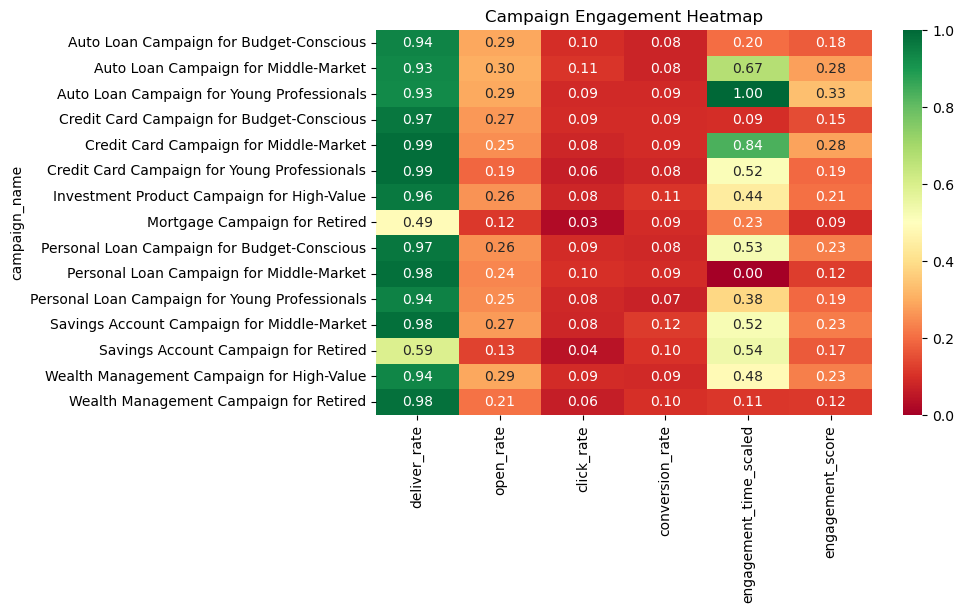

In [96]:
df_plt = df_m.drop("engagement_time_mean",axis=1)
plt.figure(figsize=(8, 5))
sns.heatmap(
    df_plt.set_index("campaign_name"),
    annot=True, cmap="RdYlGn", fmt=".2f"
)
plt.title("Campaign Engagement Heatmap")
plt.show()


In [97]:
profit_generated = (
  df_campaigns.groupby('campaign_name').agg(
    total_revenue = ('total_revenue_generated','sum'),
    total_campaign_cost=('total_campaign_cost','sum'),
    customer_segment=('customer_segment', 'first'),  # or use mode/most frequent
    recommended_product_name=('recommended_product_name', 'first')
  )
  .assign(total_profit = lambda x:((x['total_revenue']-x['total_campaign_cost'])/1000))
  .reset_index()
  .sort_values(by="total_profit")
)

print(profit_generated)

                                     campaign_name  total_revenue  \
2       Auto Loan Campaign for Young Professionals       29154.99   
5     Credit Card Campaign for Young Professionals       86319.79   
3        Credit Card Campaign for Budget-Conscious      104820.46   
12            Savings Account Campaign for Retired      237154.71   
1             Auto Loan Campaign for Middle-Market      248382.54   
7                    Mortgage Campaign for Retired      392904.32   
9         Personal Loan Campaign for Middle-Market      280866.72   
0          Auto Loan Campaign for Budget-Conscious      285963.10   
10  Personal Loan Campaign for Young Professionals      302228.22   
6       Investment Product Campaign for High-Value      385408.90   
13       Wealth Management Campaign for High-Value      404706.95   
8      Personal Loan Campaign for Budget-Conscious      499335.86   
4           Credit Card Campaign for Middle-Market      462859.89   
11      Savings Account Campaign f

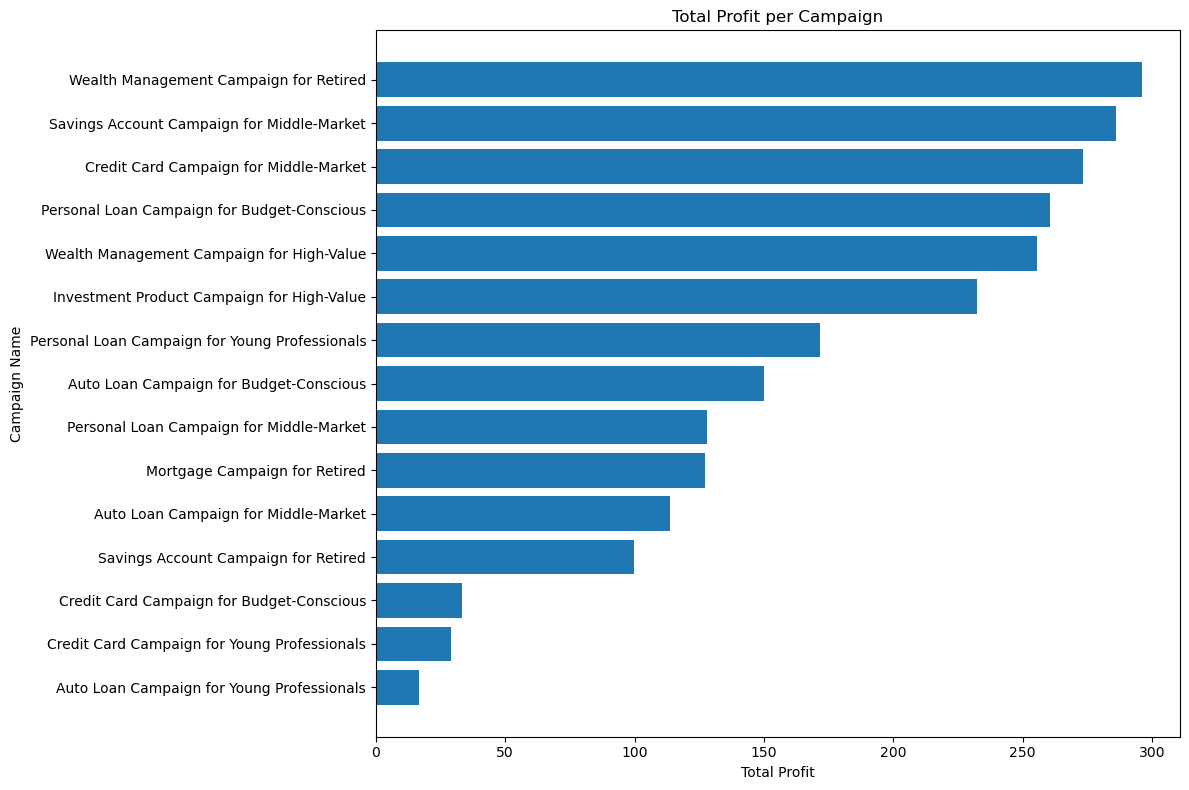

In [98]:
campaigns = profit_generated['campaign_name']
total_profits = profit_generated['total_profit']

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(campaigns, total_profits)

# Labels & title
plt.xlabel('Total Profit')
plt.ylabel('Campaign Name')
plt.title('Total Profit per Campaign')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [99]:
df_m= df_m.merge(profit_generated,on="campaign_name",how = 'left')

In [100]:
#filtering values
df_converted = df[df["conversion_status"]==1].copy()
df_converted_churn = df_converted[df_converted["churn_prob"]>0].copy()

#expectedlifetime of customer = 1/churn probability
#clv = monthly revenue * expected lifetime of customer
df_converted_churn["monthly_revenue"] = df_converted_churn["total_transaction_amount_12m"]/12
df_converted_churn["expected_lifetime"] = 1/df_converted_churn['churn_prob']
df_converted_churn["clv"]= df_converted_churn["monthly_revenue"] * df_converted_churn["expected_lifetime"]
clv_per_camp = df_converted_churn.groupby(["campaign_name"])["clv"].mean().mul(1/1000).reset_index().sort_values(by="clv")

clv_per_camp

#merge clv into main df_m
df_m=df_m.merge(clv_per_camp,on="campaign_name",how = "left")

In [101]:
df_m

,campaign_name,deliver_rate,open_rate,click_rate,conversion_rate,engagement_time_mean,engagement_time_scaled,engagement_score,total_revenue,total_campaign_cost,customer_segment,recommended_product_name,total_profit,clv
0,Auto Loan Campaign for Budget-Conscious,0.939878,0.290715,0.095890,0.076865,46594.783105,0.201196,0.175399,285963.10,135924.98,Budget-Conscious,Auto Loan,150.03812,316.538191
1,Auto Loan Campaign for Middle-Market,0.932671,0.302428,0.108168,0.077263,46934.194260,0.671339,0.279080,248382.54,134700.03,Middle-Market,Auto Loan,113.68251,302.083620
2,Auto Loan Campaign for Young Professionals,0.926273,0.294906,0.088472,0.088472,47171.465147,1.000000,0.332708,29154.99,12412.06,Young Professionals,Auto Loan,16.74293,306.805207
3,Credit Card Campaign for Budget-Conscious,0.966767,0.268882,0.093656,0.093656,46517.361027,0.093953,0.146283,104820.46,71483.16,Budget-Conscious,Credit Card,33.33730,281.518868
4,Credit Card Campaign for Middle-Market,0.987088,0.251130,0.081988,0.093609,47052.860878,0.835713,0.283476,462859.89,189512.20,Middle-Market,Credit Card,273.34769,335.801218
5,Credit Card Campaign for Young Professionals,0.986689,0.191348,0.064892,0.081531,46821.447587,0.515165,0.192883,86319.79,57267.88,Young Professionals,Credit Card,29.05191,423.946193
6,Investment Product Campaign for High-Value,0.962963,0.259909,0.079922,0.107212,46767.315789,0.440183,0.205970,385408.90,152993.99,High-Value,Investment Product,232.41491,329.569427
7,Mortgage Campaign for Retired,0.485893,0.115465,0.026123,0.092999,46612.384535,0.225577,0.092816,392904.32,265614.01,Retired,Mortgage,127.29031,371.201380
8,Personal Loan Campaign for Budget-Conscious,0.966190,0.255238,0.092381,0.082381,46828.628333,0.525112,0.227784,499335.86,238916.39,Budget-Conscious,Personal Loan,260.41947,338.767134
9,Personal Loan Campaign for Middle-Market,0.983774,0.239221,0.099212,0.093185,46449.533611,0.000000,0.121372,280866.72,152833.68,Middle-Market,Personal Loan,128.03304,333.861909


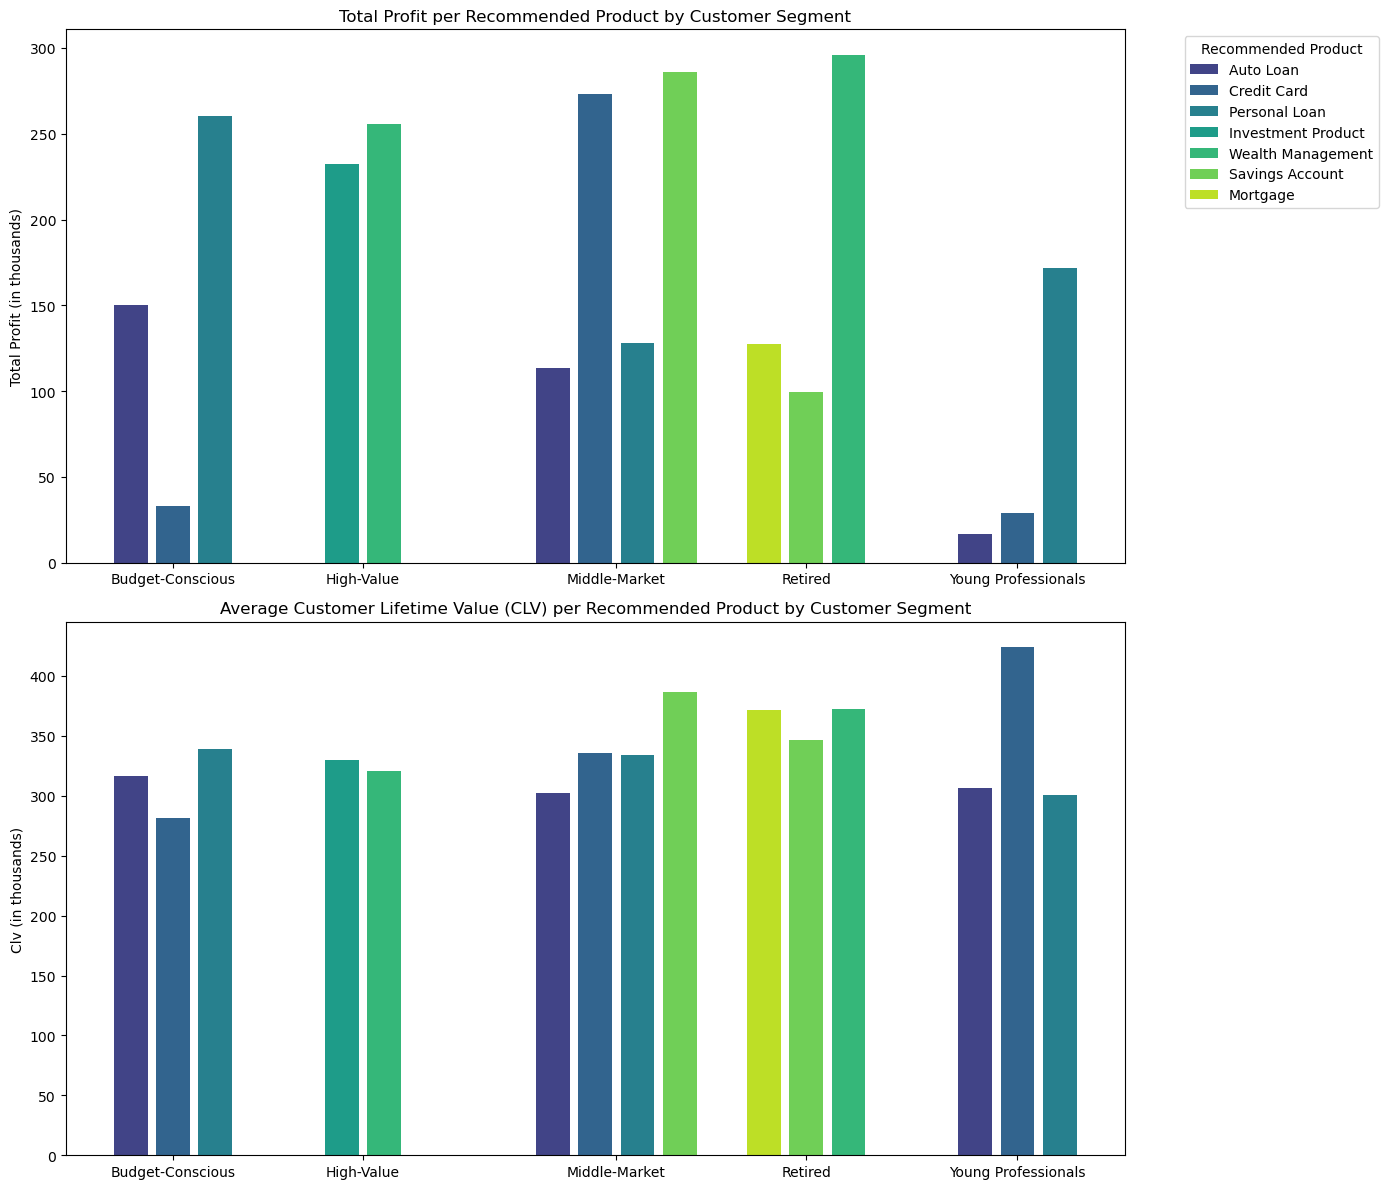

In [108]:

# Group the data
metrics = ['total_profit', 'clv']
grouped = df_m.groupby(['customer_segment', 'recommended_product_name'])[metrics].sum().reset_index()
grouped = grouped[(grouped['total_profit'] > 0) | (grouped['clv'] > 0)]

segments = grouped['customer_segment'].unique()
products = grouped['recommended_product_name'].unique()
product_colors = dict(zip(products, cm.viridis(np.linspace(0.2, 0.9, len(products)))))

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
axes = [ax1, ax2]
titles = ["Total Profit per Recommended Product by Customer Segment",
          "Average Customer Lifetime Value (CLV) per Recommended Product by Customer Segment"]
value_cols = ['total_profit', 'clv']

# Shared segment x-positions
segment_positions = []

for i, segment in enumerate(segments):
    df_segment = grouped[grouped['customer_segment'] == segment]
    product_subset = df_segment[df_segment['total_profit'] > 0]  # use either metric
    n = len(product_subset)
    mid = i * 5 + (n - 1) / 2 if n > 0 else i * 5
    segment_positions.append(mid)

# Plotting
for ax, val_col, title in zip(axes, value_cols, titles):
    for i, segment in enumerate(segments):
        df_segment = grouped[grouped['customer_segment'] == segment]
        df_segment = df_segment[df_segment[val_col] > 0]

        product_names = df_segment['recommended_product_name'].values
        values = df_segment[val_col].values
        positions = np.arange(len(values)) + i * 5

        for pos, product, value in zip(positions, product_names, values):
            ax.bar(pos, value, color=product_colors[product], label=product)

    # Titles and labels
    ax.set_ylabel(val_col.replace('_', ' ').title() + " (in thousands)")
    ax.set_title(title)

# Set x-ticks on both plots using the calculated centers
for ax in axes:
    ax.set_xticks(segment_positions)
    ax.set_xticklabels(segments)

# Deduplicated legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), title="Recommended Product", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


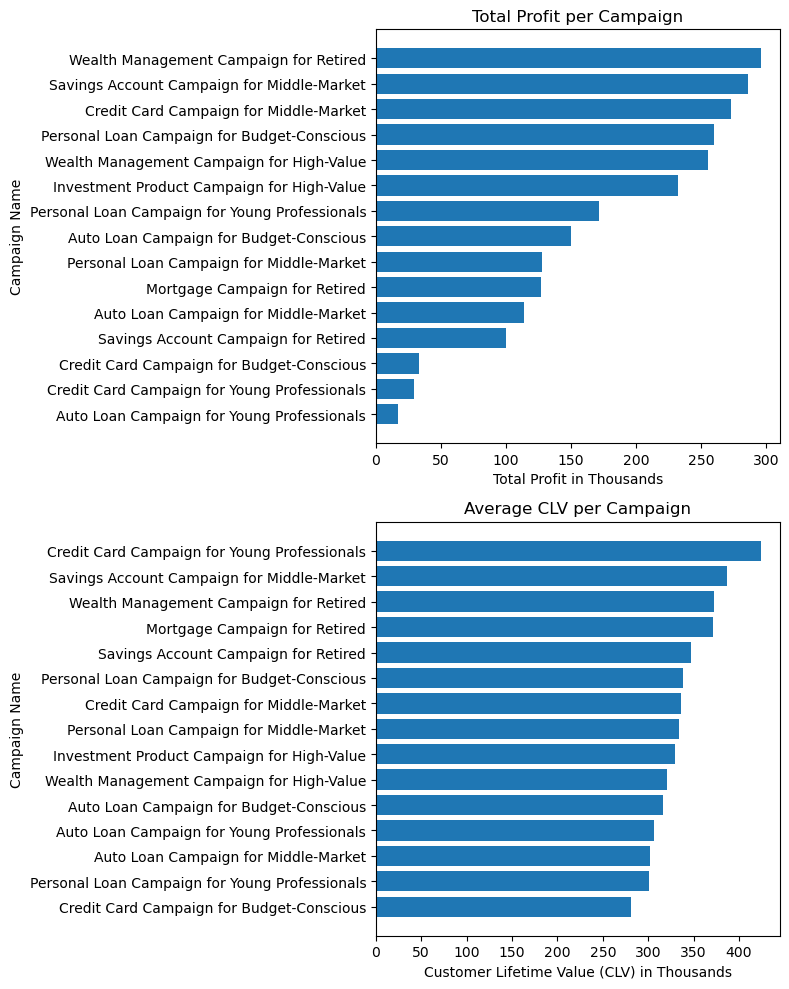

In [104]:
campaigns1 = profit_generated['campaign_name']
total_profits = profit_generated['total_profit']

campaigns2 = clv_per_camp['campaign_name']
clv = clv_per_camp['clv']

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(2, 1, figsize=(8, 10))  # Adjust figsize as needed

# Plot 1: Total Profit per Campaign
ax[0].barh(campaigns1, total_profits)
ax[0].set_xlabel('Total Profit in Thousands')
ax[0].set_ylabel('Campaign Name')
ax[0].set_title('Total Profit per Campaign')

# Plot 2: CLV per Campaign
ax[1].barh(campaigns2, clv)  # Optional: change color for contrast
ax[1].set_xlabel('Customer Lifetime Value (CLV) in Thousands')
ax[1].set_ylabel('Campaign Name')  # Skip to avoid duplication
ax[1].set_title('Average CLV per Campaign')

# Adjust layout
plt.tight_layout()

# Show both plots together
plt.show()

In [106]:
df_m[["engagement_score", "conversion_rate", "clv", "total_profit"]].corr()


,engagement_score,conversion_rate,clv,total_profit
engagement_score,1.000000,-0.159474,-0.272817,0.006437
conversion_rate,-0.159474,1.000000,0.352952,0.373096
clv,-0.272817,0.352952,1.000000,0.169031
total_profit,0.006437,0.373096,0.169031,1.000000


Text(0.5, 1.0, 'CLV vs Total Profit by Campaign')

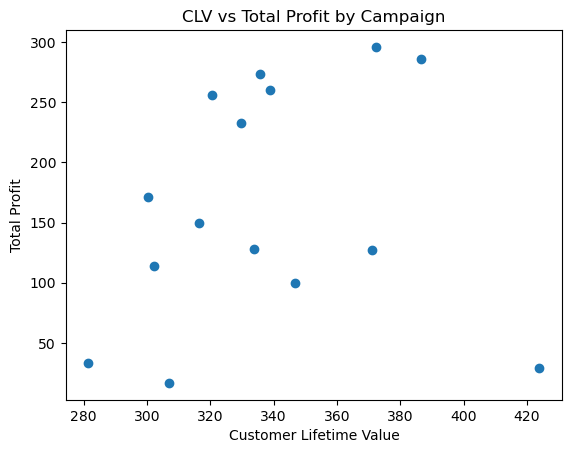

In [107]:


plt.scatter(df_m["clv"], df_m["total_profit"])
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Total Profit")
plt.title("CLV vs Total Profit by Campaign")
